In [1]:
##Population Dynamics

In [2]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
using Distributions

In [4]:
function equilibration(lambda, c, T, Np, epsilon, nsteps)
    poparray = rand(Complex{Float64},Np)
    tau_dist = Pareto(T)
    means = zeros(Complex{Float64}, nsteps)
    
    for i in 1:nsteps
        random_elements = rand(1:Np,c-1)
        omegas = poparray[random_elements]
        tau = rand(tau_dist)
        omega_cm1 = im*(lambda-epsilon*im)*tau*c + sum(im*omegas./(1.*im .+ omegas))
        poparray[rand(1:Np)] = omega_cm1
        means[i] = mean(poparray)
    end
    means
end

equilibration (generic function with 1 method)

In [5]:
function omega_cm(lambda, c, T, Np, epsilon, nsteps)
    poparray = rand(Complex{Float64},Np)
    tau_dist = Pareto(T)
    for i in 1:nsteps
        random_elements = rand(1:Np,c-1)
        omegas = poparray[random_elements]
        tau = rand(tau_dist)
        omega_cm1 = im*(lambda-epsilon*im)*tau*c + sum(im*omegas./(1.*im .+ omegas))
        poparray[rand(1:Np)] = omega_cm1
    end
    poparray
end

omega_cm (generic function with 1 method)

In [12]:
function rho_population(lambda, c, T, Np, ensemble, nsteps; epsilon = 1.e-4)
    omegas = omega_cm(lambda, c, T, Np, epsilon, nsteps);
    tau_dist = Pareto(T)
    res = zeros(ensemble);
    tau = rand(tau_dist)
    omega_sample = omegas[rand(1:Np,c)]
    omega_cm1 = im*(lambda-epsilon*im)*tau*c + sum(im*omega_sample./(1.*im .+ omega_sample))
    res[1] = real(tau*c/omega_cm1)
    for j in 2:ensemble
        tau = rand(tau_dist)
        omega_sample = omegas[rand(1:Np,c)]
        omega_cm1 = im*(lambda-epsilon*im)*tau*c + sum(im*omega_sample./(1.*im .+ omega_sample))
        res[j] = real(tau*c/omega_cm1)
    end
    mean(res)*1/pi
end

rho_population (generic function with 1 method)

In [46]:
function I2(lambda, c, T, Np, ensemble, nsteps, eps)
    ###Variance
    omegas = omega_cm(lambda, c, T, Np, epsilon, nsteps);
    tau_dist = Pareto(T)
    res = zeros(ensemble);
    tau = rand(tau_dist)
    omega_sample = omegas[rand(1:Np,c)]
    omega_cm1 = im*(lambda-epsilon*im)*tau*c + sum(im*omega_sample./(1.*im .+ omega_sample))
    res[1] = real(tau*c/omega_cm1)
    for j in 2:ensemble
        tau = rand(tau_dist)
        omega_sample = omegas[rand(1:Np,c)]
        omega_cm1 = im*(lambda-epsilon*im)*tau*c + sum(im*omega_sample./(1.*im .+ omega_sample))
        res[j] = real(tau*c/omega_cm1)
    end
    var(res)
end

I2 (generic function with 1 method)

In [54]:
Np = 2500
nsteps = 25000
c = 5
T = 1.5
lambda = 1.
epsilon = 1.e-4
ensemble = Int64(10^6)
lambda_grid = -1.6:0.01:0.0
#lambda_grid = -logspace(-2.,0.2, 100);

In [55]:
rho_p = [rho_population(i, c, T, Np, ensemble, nsteps; epsilon = epsilon)for i in lambda_grid];
i2 = [I2(i, c, T, Np, ensemble, nsteps, epsilon) for i in lambda_grid];

In [56]:
imean = i2./rho_p*(2.*epsilon/pi);

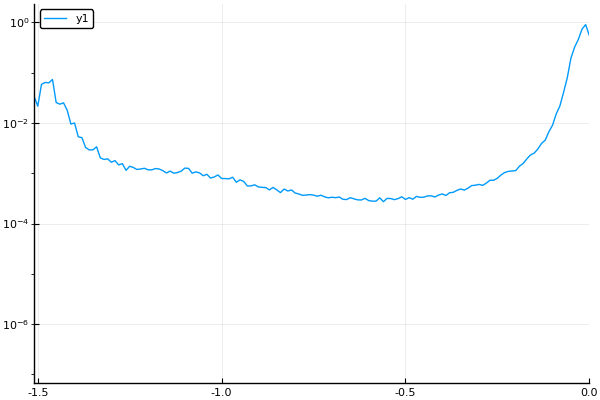

In [59]:
plot(lambda_grid, imean, yscale = :log10, xlim = (-1.51,0.))

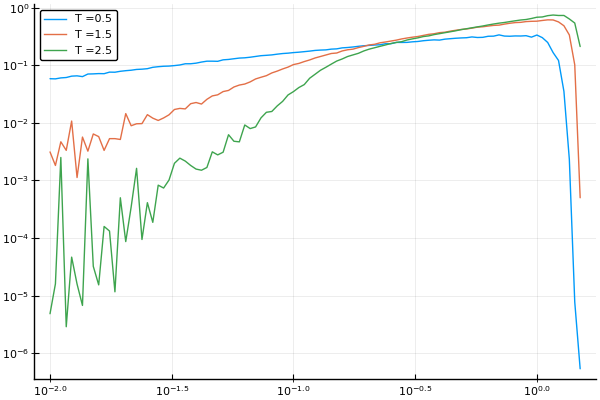

In [18]:
T = [0.5, 1.5, 2.5]
k = 1
rho_p = [rho_population(i, c, T[1], Np, ensemble, nsteps; epsilon = epsilon)for i in lambda_grid]
plot(-lambda_grid[1:end-1], (rho_p.*(-lambda_grid))[1:end-1], label = "T =$(T[k])", 
    xscale = :log10, yscale = :log10)
for k in 2:length(T)
    rho_p = [rho_population(i, c, T[k], Np, ensemble, nsteps; epsilon = epsilon)for i in lambda_grid]
    plot!(-lambda_grid[1:end-1], (rho_p.*(-lambda_grid))[1:end-1], label = "T =$(T[k])")
end
plot!()


In [ ]:
T = [0.5, 1.5, 2.5]
k = 1
rho_p = [rho_population(i, c, T[1], Np, ensemble, nsteps)for i in lambda_grid]
plot(-lambda_grid[1:end-1], (rho_p.*(-lambda_grid))[1:end-1], label = "T =$(T[k])")
for k in 2:length(T)
    rho_p = [rho_population(i, c, T[k], Np, ensemble, nsteps)for i in lambda_grid]
    plot!(-lambda_grid[1:end-1], (rho_p.*(-lambda_grid))[1:end-1], label = "T =$(T[k])")
end
plot!()

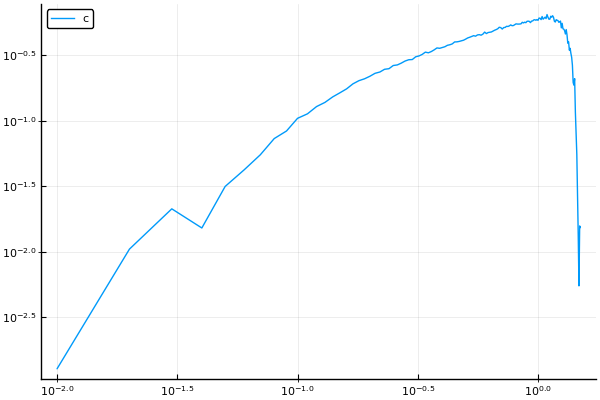

In [23]:
using JLD

In [60]:
save("rho_population.jld", "rho_pop", rho_p, "c", c, "T", T, "population", Np, "l_grid", lambda_grid, 
"ensemble", ensemble, "epsilon", eps)